In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv')
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [2]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [3]:
df_credit = credit.drop('Customer Key', axis=1)
df_credit = df_credit.drop('Sl_No', axis=1)

df_credit.head()



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

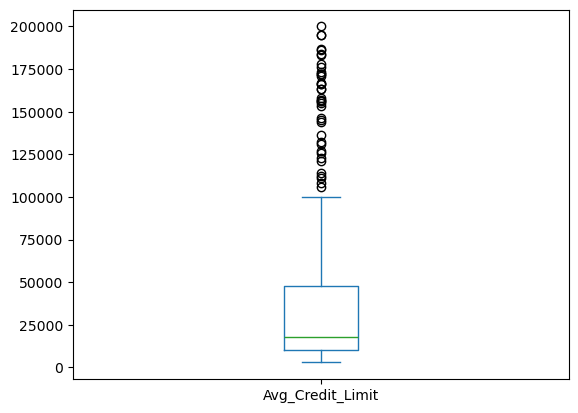

In [4]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


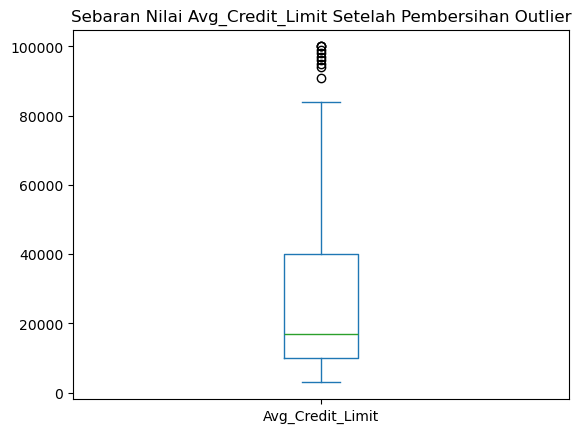

In [5]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(data_frame, kolom_outlier):
    if is_numeric_dtype(data_frame[kolom_outlier]):
        Q1 = data_frame[kolom_outlier].quantile(0.25)
        Q3 = data_frame[kolom_outlier].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data_bersih = data_frame[(data_frame[kolom_outlier] >= lower_bound) & 
                                 (data_frame[kolom_outlier] <= upper_bound)]
        return data_bersih
    else:
        print(f"Kolom {kolom_outlier} bukan tipe data numerik.")
        return data_frame

credit_clean = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", credit_clean.shape[0])

credit_clean['Avg_Credit_Limit'].plot(kind='box')
plt.title("Sebaran Nilai Avg_Credit_Limit Setelah Pembersihan Outlier")
plt.show()

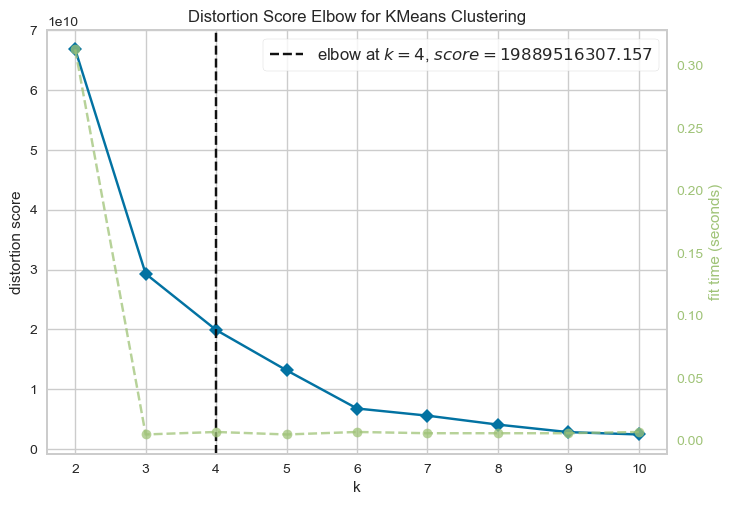

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:


import warnings 
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

KMeansC = KMeans (random_state=93)
vis = KElbowVisualizer(KMeansC, k=(2,11))
vis.fit(credit_clean)
vis.show()

Silhouette Score K-Means for  2  clusters : 0.7254150167909509
Silhouette Score K-Means for  3  clusters : 0.7058100919802311
Silhouette Score K-Means for  4  clusters : 0.6783832492476802
Silhouette Score K-Means for  5  clusters : 0.6967888465939891
Silhouette Score K-Means for  6  clusters : 0.6271336425919736
Silhouette Score K-Means for  7  clusters : 0.5988247715843502
Silhouette Score K-Means for  8  clusters : 0.5890945232704698
Silhouette Score K-Means for  9  clusters : 0.6069167675816625
Silhouette Score K-Means for  10  clusters : 0.5980136919206368


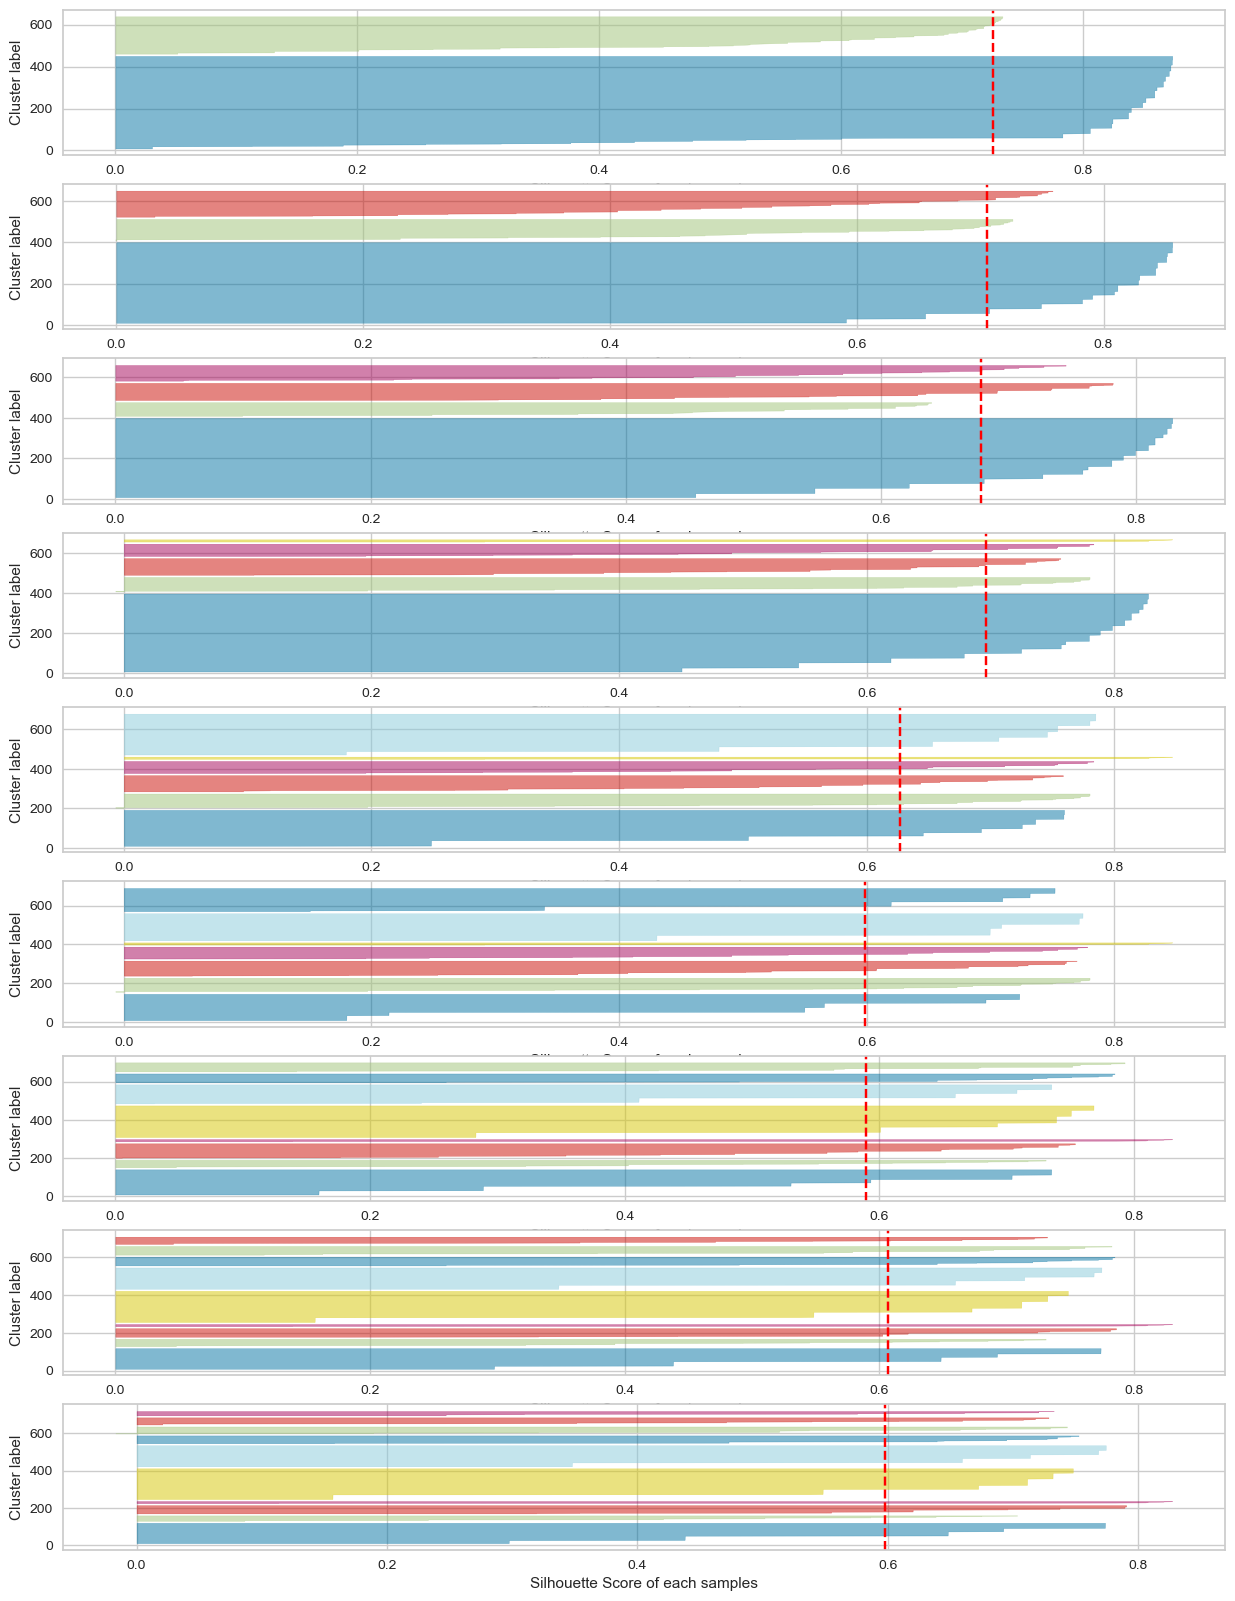

In [7]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    KMeansC = KMeans(n_clusters=k, init='k-means++', random_state=93)
    KM_clusters=KMeansC.fit_predict(credit_clean)
    print("Silhouette Score K-Means for ", k, " clusters :", silhouette_score(credit_clean, KM_clusters))

    sil_vis = SilhouetteVisualizer(KMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(credit_clean)

    ax[k-2].set(xlabel='Silhouette Score of each samples', ylabel="Cluster label")

In [8]:
credit_clean.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

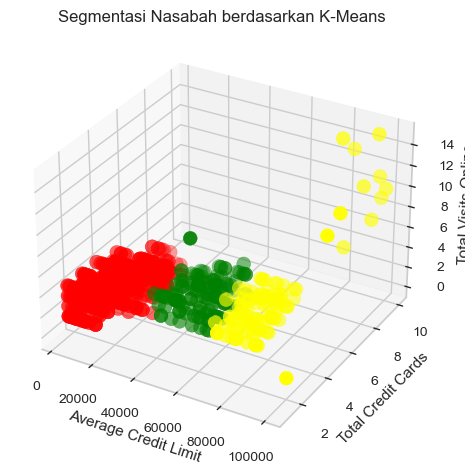

Silhouette Score K-Means: 0.706


In [9]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=93)
K_clusters = kmeans. fit_predict(credit_clean)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blu', 4:'magenta', 5:'black', 6:'cyan'}

ax.scatter(credit_clean['Avg_Credit_Limit' ], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'], c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print ("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_clean, K_clusters))

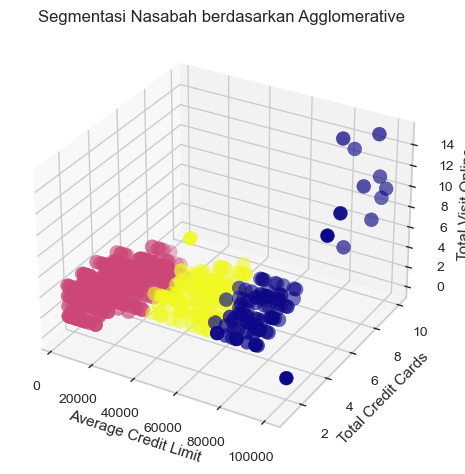

silhouette score Agglomerative: 0.705


In [10]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(credit_clean)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()

ax = plt.axes(projection = '3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
            c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visit Online')

plt.show()

print("silhouette score Agglomerative: %0.3f" % silhouette_score(credit_clean, AGG_clusters))

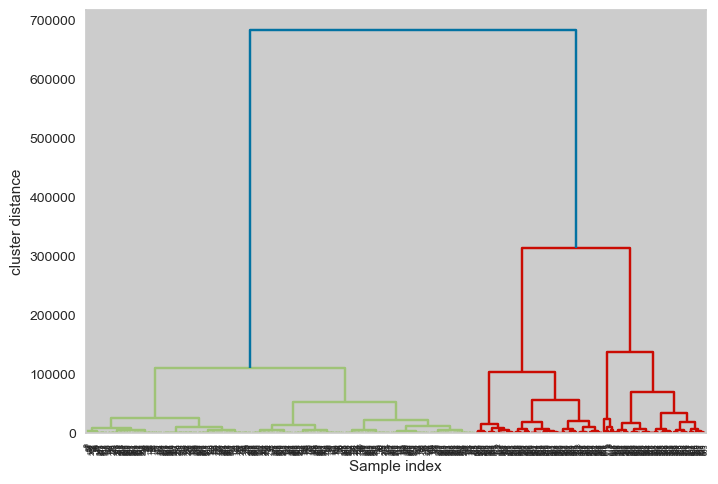

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(credit_clean, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("cluster distance")
plt.show()

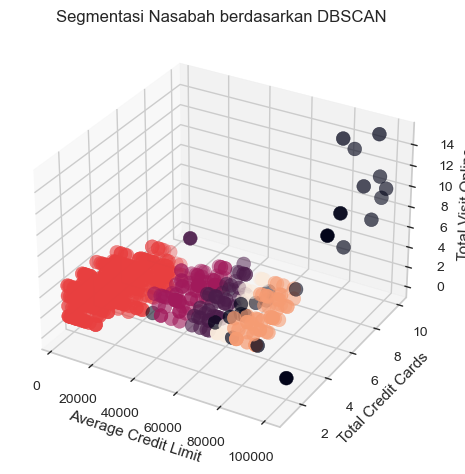

silhouette score DBSCAN: 0.657


In [12]:
DBSC = DBSCAN(min_samples=20,eps = 2500)

DBSC_clusters= DBSC.fit_predict(credit_clean)

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
            c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visit Online')

plt.show()

print("silhouette score DBSCAN: %0.3f" % silhouette_score(credit_clean, DBSC_clusters))

In [13]:
import pickle

with open("KMeans_model.pkl", "wb") as r:
    pickle.dump((kmeans),r)

with open("AGG_model.pkl", "wb") as r:
    pickle.dump((AGG),r)

with open("DBSCAN_model.pkl", "wb") as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
